<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_022_feature_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



### Load & Preprocess Data

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

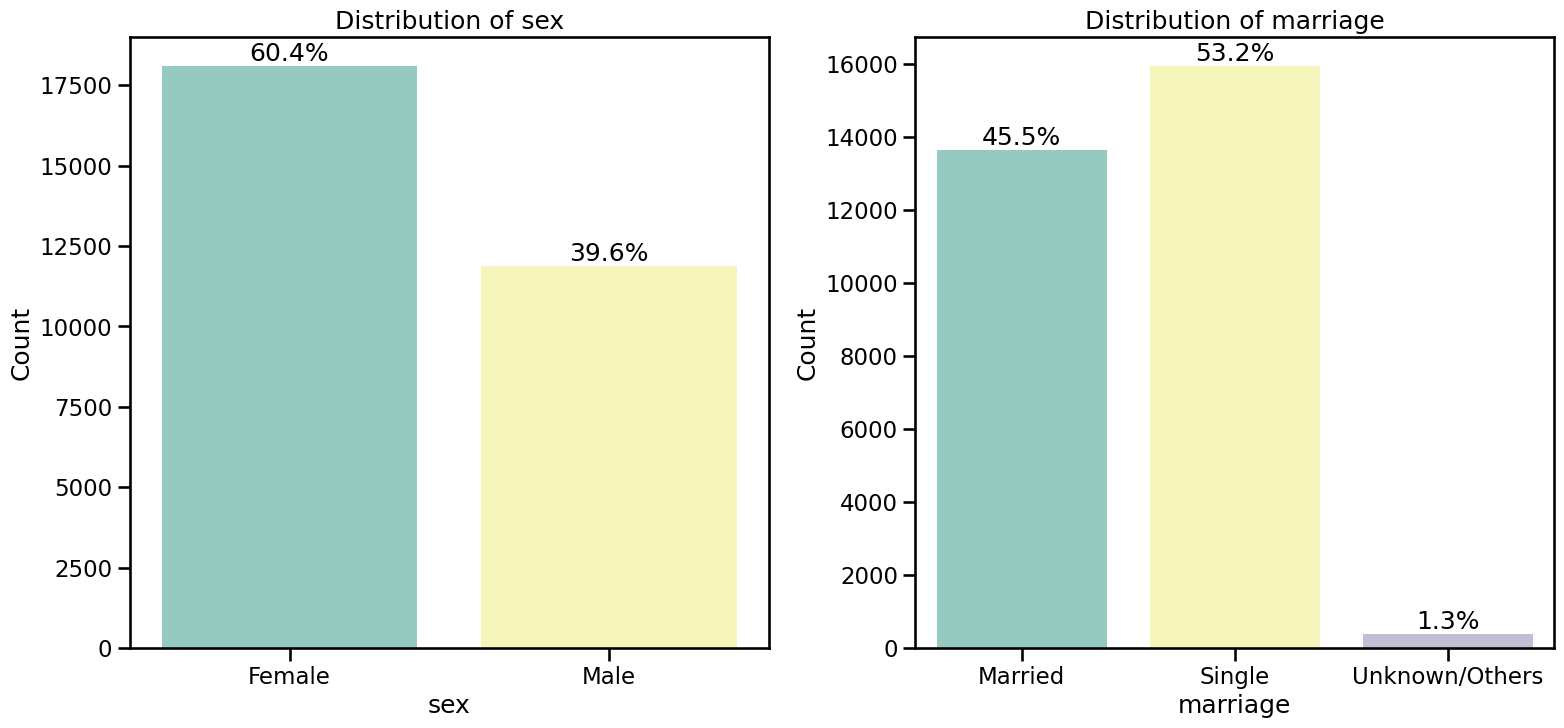

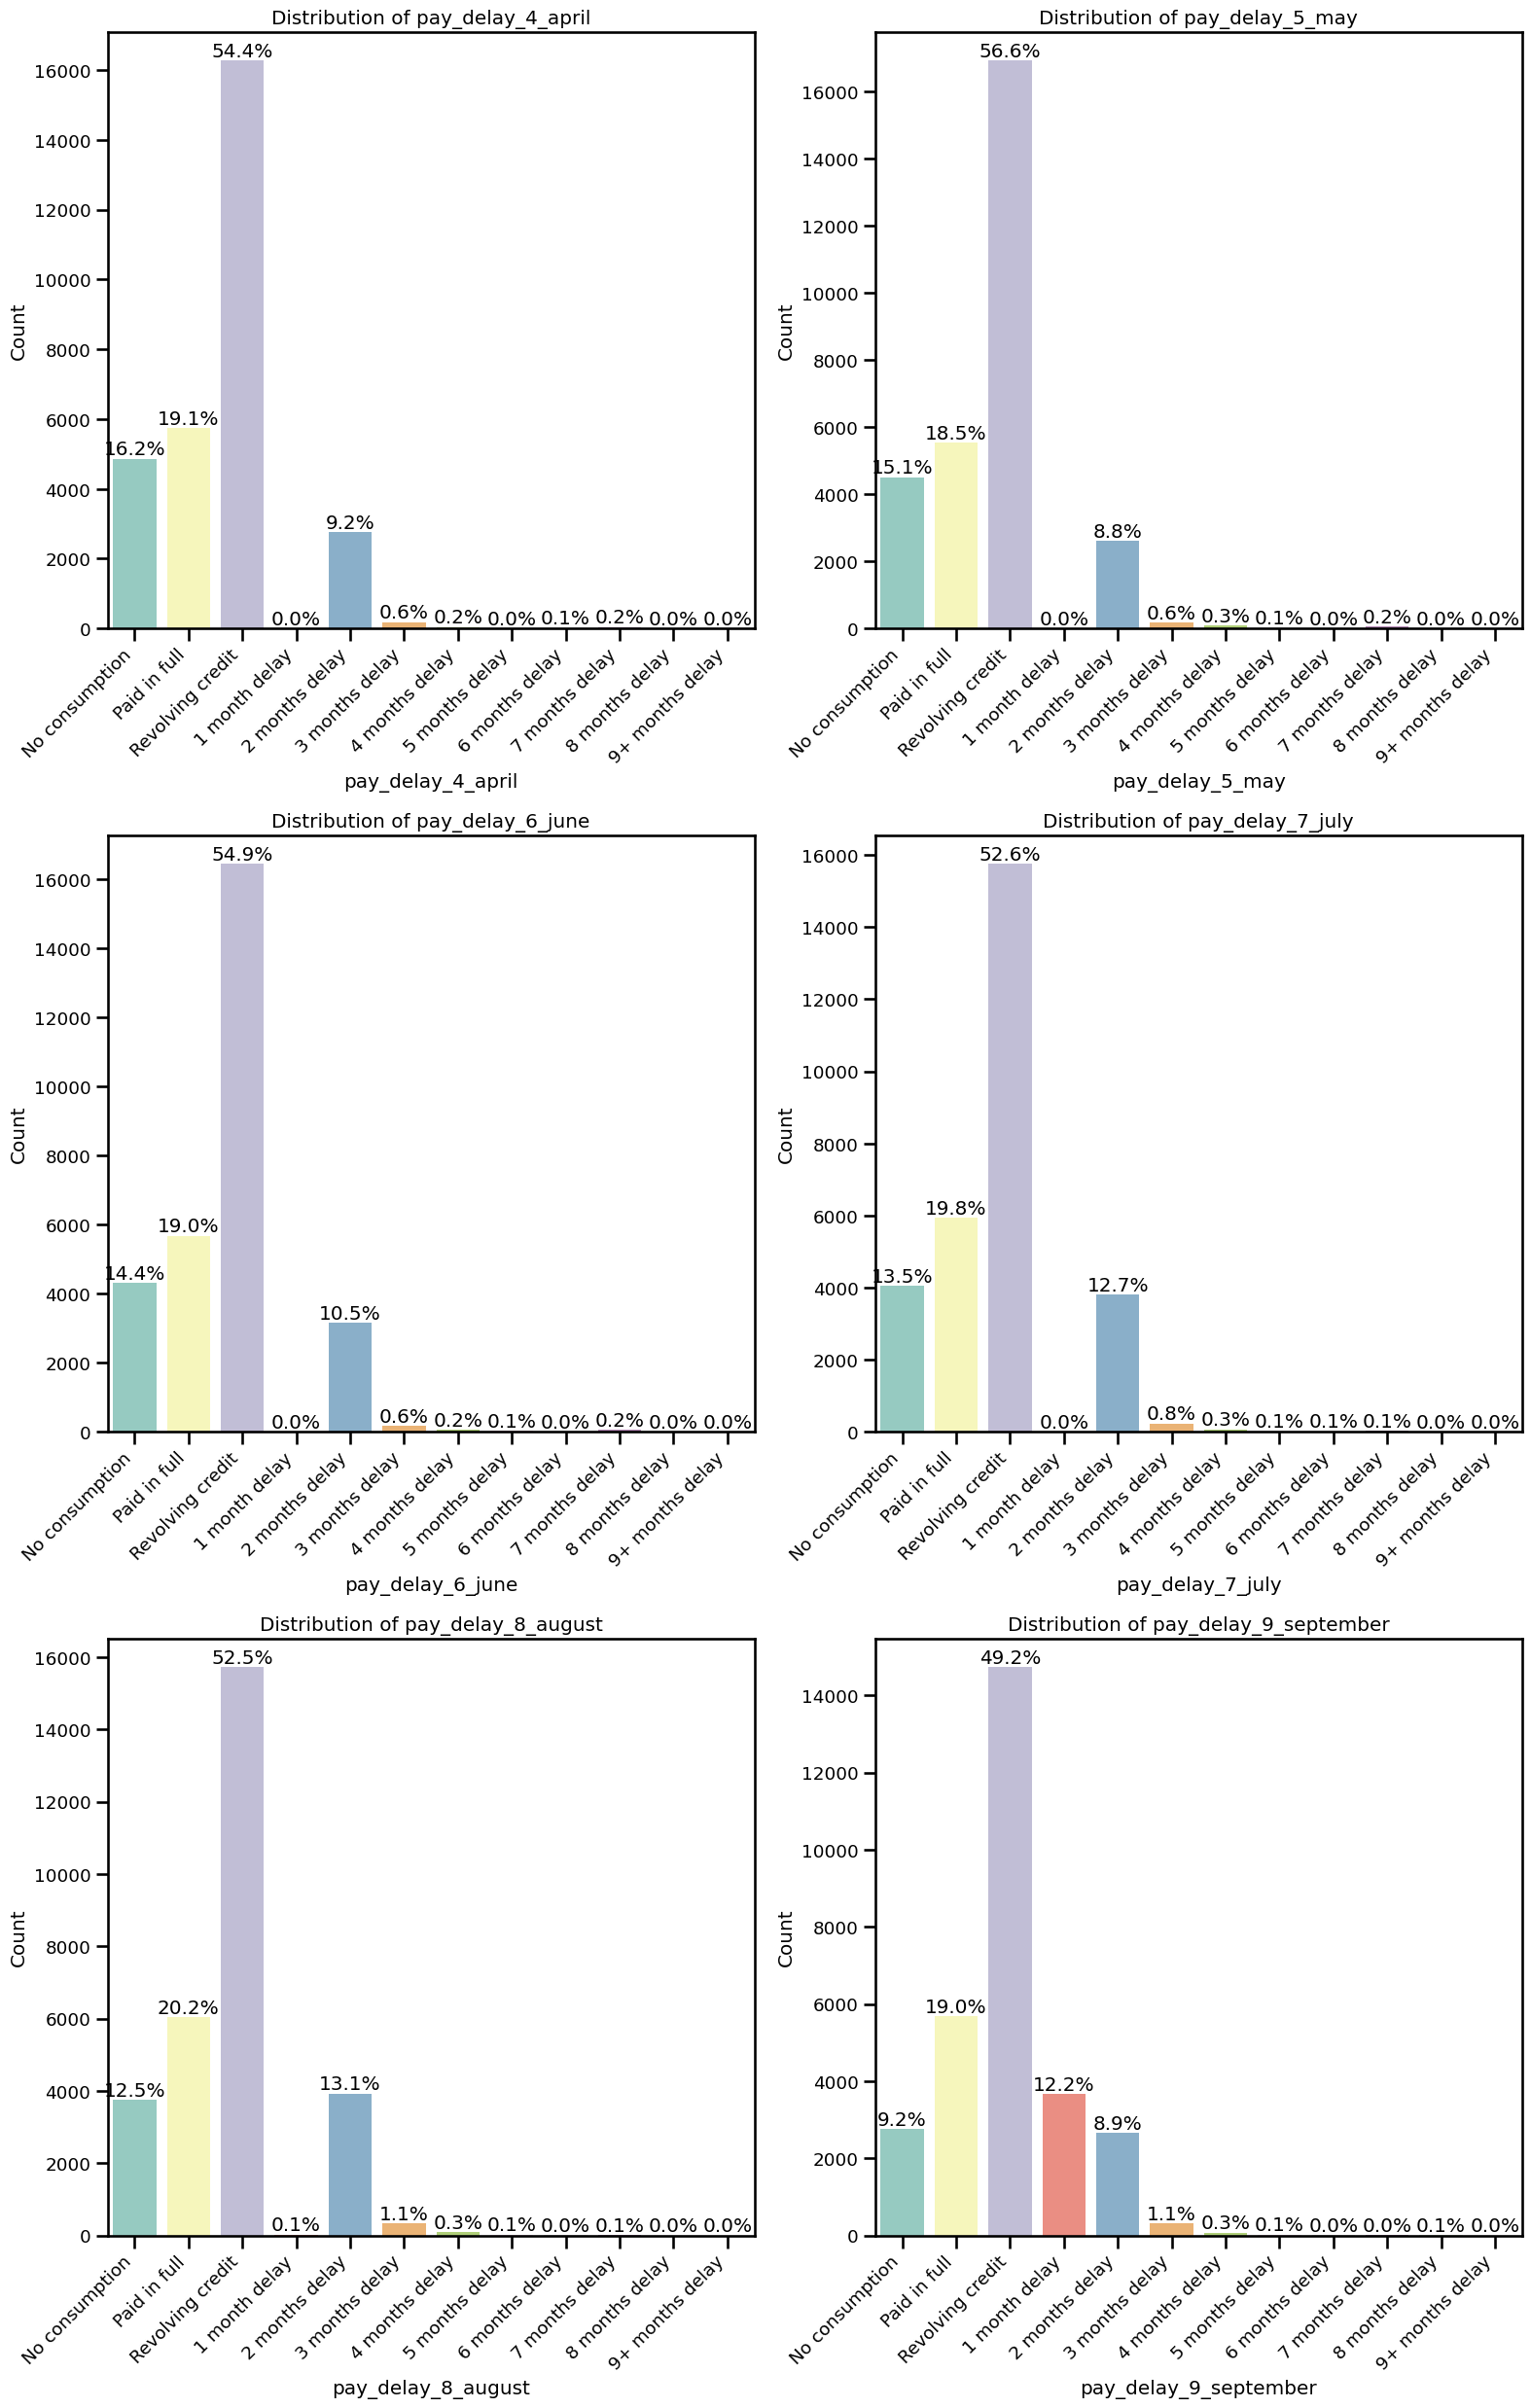

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,load_and_preprocess_data,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column, process_sex_column_cat_codes_one_two,
                             process_marriage_column, process_default_payment_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns, categorical_columns,
                             plot_categorical_distributions, plot_ordinal_distributions)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    # df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols + [target])
else:
    print("Error loading and preprocessing data.")

print('Target as numeric')
print(df['default_payment_next_month'].dtype)
print(df[target].value_counts())

# visualize the categorical data
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Feature Engineering Opportunities

### 1. **Create Binary Flags for "Other/Unknown" Categories**
   - Since `Other/Unknown` categories in `education` and `marriage` are significantly associated with defaults, you can create binary indicator features that specifically capture whether an observation falls into these categories. These features would allow the model to learn if being in the `Other/Unknown` category contributes more to default risk.
   
   ```python
   df['is_education_other_unknown'] = (df['education'] == 'Other/Unknown').astype(int)
   df['is_marriage_other_unknown'] = (df['marriage'] == 'Unknown/Others').astype(int)
   ```

   This binary feature would be `1` if a person is in the `Other/Unknown` category, otherwise `0`. This isolates the effect of these categories and enables the model to treat them differently.

### 2. **Create Risk Ratios for Categories**
   - Given the strong relationship between these categories and defaults, you can calculate the default risk ratio for each category of `education` and `marriage`. This can then be used as a feature to quantify how risky each category is.

   ```python
   # Calculate default rates by category
   education_default_rates = df.groupby('education')['default_payment_next_month'].mean()
   marriage_default_rates = df.groupby('marriage')['default_payment_next_month'].mean()

   # Map the rates back to the dataframe
   df['education_risk_ratio'] = df['education'].map(education_default_rates)
   df['marriage_risk_ratio'] = df['marriage'].map(marriage_default_rates)
   ```

   This way, the model learns from the quantified risk associated with each category rather than relying purely on the raw categorical values.

### 3. **Weight of Evidence (WoE) and Information Value (IV)**
   - Calculate the Weight of Evidence (WoE) and Information Value (IV) for the categories of `education` and `marriage`. These metrics help quantify the predictive power of categorical variables with respect to a binary target like loan defaults.

   ```python
   # WoE and IV require specialized packages or functions, you can calculate them by transforming:
   def calculate_woe_iv(data, feature, target):
       data = data[[feature, target]].copy()
       grouped = data.groupby(feature)[target].agg(['count', 'sum'])
       grouped['non_event'] = grouped['count'] - grouped['sum']
       grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
       grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
       grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
       grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
       iv = grouped['iv'].sum()
       return grouped[['woe']], iv

   woe_education, iv_education = calculate_woe_iv(df, 'education', 'default_payment_next_month')
   woe_marriage, iv_marriage = calculate_woe_iv(df, 'marriage', 'default_payment_next_month')

   # Merge WOE into the original dataframe
   df['education_woe'] = df['education'].map(woe_education['woe'])
   df['marriage_woe'] = df['marriage'].map(woe_marriage['woe'])
   ```

   WoE transforms the categories into numerical values based on their contribution to the target variable, while IV provides insight into the predictive power of each feature.



### Feature Engineering Transformers Pipeline

In [8]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns, CombinedFeatureEngineeringTransformer

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Define the pipeline without SMOTE (for testing the transformers and feature engineering)
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))  # Feature engineering
])

# Step 2: Fit the training pipeline and transform the data (without SMOTE)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   limit_bal                                    23972 non-null  int64   
 1   sex                                          23972 non-null  category
 2   education                                    23972 non-null  category
 3   marriage                                     23972 non-null  category
 4   age                                          23972 non-null  int64   
 5   bill_amt_4_april                             23972 non-null  float64 
 6   bill_amt_5_may                               23972 non-null  float64 
 7   bill_amt_6_june                              23972 non-null  float64 
 8   bill_amt_7_july                              23972 non-null  float64 
 9   bill_amt_8_august                            23972 non-null  f

### Education Marriage Unknown Transformer

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class EducationMarriageUnknownFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Feature for when either education or marriage is "Other/Unknown"
        X['education_or_marriage_unknown_flag'] = ((X['education'] == 'Other/Unknown') |
                                                   (X['marriage'] == 'Unknown/Others')).astype('bool')

        # Feature for when both education and marriage are "Other/Unknown"
        X['education_and_marriage_unknown_flag'] = ((X['education'] == 'Other/Unknown') &
                                                    (X['marriage'] == 'Unknown/Others')).astype('bool')

        return X

In [11]:
# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)

        return X

In [12]:
# Step 1: Define the pipeline without preprocessing (for testing the feature engineering transformers only)
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))  # Feature engineering only
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.loc[:, 'education_marriage':].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   education_marriage                   23972 non-null  category
 1   education_or_marriage_unknown_flag   23972 non-null  bool    
 2   education_and_marriage_unknown_flag  23972 non-null  bool    
dtypes: bool(2), category(1)
memory usage: 257.9 KB


#### Data Check

In [ ]:
# Step 3: Check row counts in the training data (Education OR Marriage Unknown, and Education AND Marriage Unknown)
education_or_marriage_unknown_count = X_train[(X_train['education'] == 'Other/Unknown') | (X_train['marriage'] == 'Unknown/Others')].shape[0]
education_and_marriage_unknown_count = X_train[(X_train['education'] == 'Other/Unknown') & (X_train['marriage'] == 'Unknown/Others')].shape[0]

# Display original row counts for comparison in training data
print(f"Education OR Marriage Unknown (X_train): {education_or_marriage_unknown_count}")
print(f"Education AND Marriage Unknown (X_train): {education_and_marriage_unknown_count}")

# Step 4: Check row counts in the transformed data for both flags
education_or_marriage_flag_count = X_train_processed[X_train_processed['education_or_marriage_unknown_flag'] == True].shape[0]
education_and_marriage_flag_count = X_train_processed[X_train_processed['education_and_marriage_unknown_flag'] == True].shape[0]

# Display transformed row counts
print(f"Education OR Marriage Unknown Flag (transformed data): {education_or_marriage_flag_count}")
print(f"Education AND Marriage Unknown Flag (transformed data): {education_and_marriage_flag_count}")

Education OR Marriage Unknown (X_train): 683
Education AND Marriage Unknown (X_train): 7
Education OR Marriage Unknown Flag (transformed data): 683
Education AND Marriage Unknown Flag (transformed data): 7


### Education Marriage Risk Ratios

In [13]:
class RiskRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_col='education', marriage_col='marriage', target_col='default_payment_next_month'):
        self.education_col = education_col
        self.marriage_col = marriage_col
        self.target_col = target_col
        self.education_default_rates = None
        self.marriage_default_rates = None

    def fit(self, X, y=None):
        if y is None:
            raise ValueError("Target variable 'y' is required for fit.")
        X = X.copy()
        X[self.target_col] = y  # Add the target column to X

        # Calculate the default rates
        self.education_default_rates = X.groupby(self.education_col, observed=True)[self.target_col].mean()
        self.marriage_default_rates = X.groupby(self.marriage_col, observed=True)[self.target_col].mean()

        return self

    def transform(self, X):
        X = X.copy()
        X['education_risk_ratio'] = X[self.education_col].map(self.education_default_rates).astype(float)
        X['marriage_risk_ratio'] = X[self.marriage_col].map(self.marriage_default_rates).astype(float)
        return X


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns, CombinedFeatureEngineeringTransformer

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)
        X = RiskRatioTransformer().fit_transform(X,y)

        return X

# Define the pipeline with column lists passed directly to the transformers
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.loc[:, 'education_marriage':].info()


<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   education_marriage                   23972 non-null  category
 1   education_or_marriage_unknown_flag   23972 non-null  bool    
 2   education_and_marriage_unknown_flag  23972 non-null  bool    
 3   education_risk_ratio                 23972 non-null  float64 
 4   marriage_risk_ratio                  23972 non-null  float64 
dtypes: bool(2), category(1), float64(2)
memory usage: 632.5 KB


#### Data Check

In [ ]:
# Combine X_train and y_train into a single DataFrame
train_data = X_train.copy()
train_data['default_payment_next_month'] = y_train

# Calculate default rates by category
education_default_rates = train_data.groupby('education', observed=True)['default_payment_next_month'].mean()
marriage_default_rates = train_data.groupby('marriage', observed=True)['default_payment_next_month'].mean()

# Map the rates back to the dataframe
train_data['education_risk_ratio'] = train_data['education'].map(education_default_rates)
train_data['marriage_risk_ratio'] = train_data['marriage'].map(marriage_default_rates)

# Assuming 'education_risk_ratio' and 'marriage_risk_ratio' are added in the transformed data
education_risk_ratios_transformed = X_train_processed['education_risk_ratio']
marriage_risk_ratios_transformed = X_train_processed['marriage_risk_ratio']

# Print value counts for manual risk ratio calculation
print("Manual Education Risk Ratio:")
print(train_data['education_risk_ratio'].value_counts())
print("\nManual Marriage Risk Ratio:")
print(train_data['marriage_risk_ratio'].value_counts())

# Print value counts for transformer-calculated risk ratios
print("\nTransformed Education Risk Ratio:")
print(education_risk_ratios_transformed.value_counts())
print("\nTransformed Marriage Risk Ratio:")
print(marriage_risk_ratios_transformed.value_counts())

# Check if the value counts match
education_match = (train_data['education_risk_ratio'].value_counts() == education_risk_ratios_transformed.value_counts()).all()
marriage_match = (train_data['marriage_risk_ratio'].value_counts() == marriage_risk_ratios_transformed.value_counts()).all()

# Print whether they match
print(f"\nEducation Risk Ratios Match: {education_match}")
print(f"Marriage Risk Ratios Match: {marriage_match}")


Manual Education Risk Ratio:
education_risk_ratio
0.23617777777777776    11250
0.19556237460167591     8473
0.2485145957117024      3871
0.07407407407407407      378
Name: count, dtype: int64

Manual Marriage Risk Ratio:
marriage_risk_ratio
0.2107570656854302     12773
0.2331220721961973     10887
0.23717948717948717      312
Name: count, dtype: int64

Transformed Education Risk Ratio:
education_risk_ratio
0.23617777777777776    11250
0.19556237460167591     8473
0.2485145957117024      3871
0.07407407407407407      378
Name: count, dtype: int64

Transformed Marriage Risk Ratio:
marriage_risk_ratio
0.2107570656854302     12773
0.2331220721961973     10887
0.23717948717948717      312
Name: count, dtype: int64

Education Risk Ratios Match: True
Marriage Risk Ratios Match: True


### Weight of Evidence (WoE) and Information Value (IV)
Calculate the Weight of Evidence (WoE) and Information Value (IV) for the categories of education and marriage. These metrics help quantify the predictive power of categorical variables with respect to a binary target like loan defaults.

This function, `calculate_woe_iv`, is designed to calculate **Weight of Evidence (WoE)** and **Information Value (IV)** for a given feature with respect to a binary target (e.g., `default_payment_next_month`). These metrics are commonly used in credit scoring and logistic regression to assess the predictive power of categorical variables.

### What the Function is Doing:

1. **Select the relevant columns**:
   ```python
   data = data[[feature, target]].copy()
   ```
   This line creates a copy of the DataFrame containing only the `feature` (e.g., `education`, `marriage`) and `target` (e.g., `default_payment_next_month`).

2. **Group the data by the feature and calculate counts and events**:
   ```python
   grouped = data.groupby(feature)[target].agg(['count', 'sum'])
   ```
   - `groupby(feature)[target]`: Groups the data by the `feature` (e.g., `education`).
   - `.agg(['count', 'sum'])`: Aggregates the counts of occurrences and the sum of the `target` values within each category of the feature.
     - `count`: Total number of records in each category.
     - `sum`: Total number of events (e.g., defaults) in each category of the feature.

3. **Calculate non-events**:
   ```python
   grouped['non_event'] = grouped['count'] - grouped['sum']
   ```
   This calculates the number of **non-events** (e.g., non-defaults) by subtracting the number of events (`sum`) from the total count.

4. **Calculate event and non-event rates**:
   ```python
   grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
   grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
   ```
   - `event_rate`: Proportion of events (e.g., defaults) in each category relative to the total number of events.
   - `non_event_rate`: Proportion of non-events (e.g., non-defaults) in each category relative to the total number of non-events.

5. **Calculate Weight of Evidence (WoE)**:
   ```python
   grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
   ```
   WoE is the natural logarithm of the ratio between the event rate and the non-event rate. It tells you how each category of the feature compares to the overall event/non-event distribution. Positive WoE values indicate a higher likelihood of default (event), and negative values indicate a lower likelihood.

6. **Calculate Information Value (IV)**:
   ```python
   grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']
   ```
   The Information Value (IV) measures the predictive power of the feature. It is calculated by multiplying the difference between the event and non-event rates by the WoE for each category. The IV is then summed across all categories of the feature:
   - **IV < 0.02**: Not useful for prediction.
   - **0.02 < IV < 0.1**: Weak predictive power.
   - **0.1 < IV < 0.3**: Medium predictive power.
   - **IV > 0.3**: Strong predictive power.

7. **Return WoE and IV**:
   ```python
   iv = grouped['iv'].sum()
   return grouped[['woe']], iv
   ```
   - The function returns two things:
     - `grouped[['woe']]`: A DataFrame containing the WoE values for each category of the feature.
     - `iv`: The total Information Value (IV) for the feature.

### Example of Using the Function:

1. **Calculate WoE and IV for `education`**:
   ```python
   woe_education, iv_education = calculate_woe_iv(df, 'education', 'default_payment_next_month')
   ```

2. **Calculate WoE and IV for `marriage`**:
   ```python
   woe_marriage, iv_marriage = calculate_woe_iv(df, 'marriage', 'default_payment_next_month')
   ```

### Merging WoE into the Original DataFrame:

```python
df['education_woe'] = df['education'].map(woe_education['woe'])
df['marriage_woe'] = df['marriage'].map(woe_marriage['woe'])
```

- **`map()`**: This maps the WoE values from the calculated DataFrame (`woe_education['woe']`, `woe_marriage['woe']`) back to the original DataFrame (`df`) for each corresponding category of the `education` and `marriage` columns.

### Summary of What WoE and IV Are:

- **Weight of Evidence (WoE)**: Measures how strongly a category of a feature correlates with the target (e.g., loan default). Positive values indicate a higher likelihood of the event (e.g., default), and negative values indicate a lower likelihood.
  
- **Information Value (IV)**: Provides an overall score for how predictive a feature is. Higher IV means the feature has stronger predictive power.

### When They Are Useful:
- WoE and IV are especially useful in credit scoring and logistic regression models because they provide interpretable metrics for the impact of categorical variables on the target. IV can help you select the most predictive features.


In [ ]:
class WoeIvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features, target_col):
        """
        Initialize the transformer with the list of categorical features
        and the target column for calculating WoE and IV.

        Parameters:
        - features: List of categorical features to calculate WoE and IV.
        - target_col: The target column name (binary classification target).
        """
        self.features = features
        self.target_col = target_col
        self.woe_dict = {}  # To store WoE for each feature
        self.iv_dict = {}   # To store IV for each feature

    def fit(self, X, y=None):
        """
        Fit the transformer by calculating WoE and IV for each categorical feature.

        Parameters:
        - X: Input DataFrame
        - y: Target column (binary)
        """
        df = X.copy()
        df[self.target_col] = y

        for feature in self.features:
            # Group by the feature and calculate counts and sums (events)
            grouped = df.groupby(feature, observed=True)[self.target_col].agg(['count', 'sum'])

            # Calculate non-events and rates
            grouped['non_event'] = grouped['count'] - grouped['sum']
            grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
            grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()

            # Calculate WoE and IV
            grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
            grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

            iv = grouped['iv'].sum()  # Total IV for the feature

            # Store WoE and IV in dictionaries
            self.woe_dict[feature] = grouped['woe']
            self.iv_dict[feature] = iv

        return self

    def transform(self, X):
        """
        Apply the transformer to add WoE columns for each categorical feature.

        Parameters:
        - X: Input DataFrame
        """
        X = X.copy()  # Avoid modifying the original DataFrame

        # Map the calculated WoE back to the dataframe as new columns
        for feature in self.features:
            X[f'{feature}_woe'] = X[feature].map(self.woe_dict[feature]).astype(float)

        return X

    def get_iv(self):
        """
        Return the IV (Information Value) for each feature.
        """
        return self.iv_dict


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns, CombinedFeatureEngineeringTransformer

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)
        X = RiskRatioTransformer().fit_transform(X,y)
        X = WoeIvTransformer(features=['education', 'marriage'], target_col='default_payment_next_month').fit_transform(X,y)

        return X

# Define the pipeline with column lists passed directly to the transformers
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.loc[:, 'education_marriage':].info()


<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   education_marriage                   23972 non-null  category
 1   education_or_marriage_unknown_flag   23972 non-null  category
 2   education_and_marriage_unknown_flag  23972 non-null  category
 3   education_risk_ratio                 23972 non-null  category
 4   marriage_risk_ratio                  23972 non-null  category
 5   education_woe                        23972 non-null  float64 
 6   marriage_woe                         23972 non-null  float64 
dtypes: category(5), float64(2)
memory usage: 679.8 KB


#### Data Check

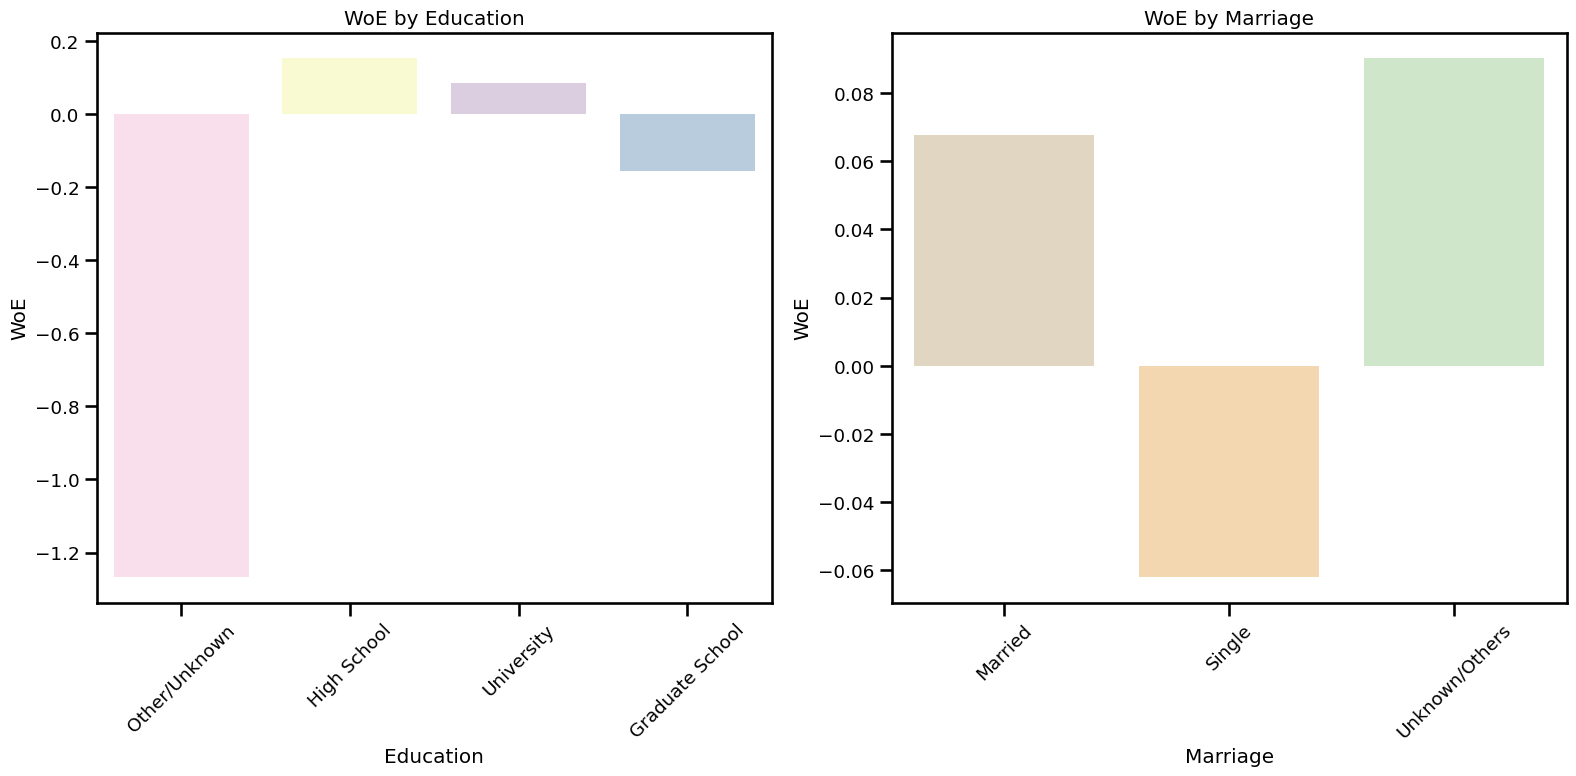

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = 'Pastel1_r'

# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Plot WoE for Education
sns.barplot(x=X_train_processed['education'], y=X_train_processed['education_woe'],
            ax=axes[0], hue=X_train_processed['education'], palette=palette)
axes[0].set_title('WoE by Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('WoE')
axes[0].tick_params(axis='x', rotation=45)

# Plot WoE for Marriage
sns.barplot(x=X_train_processed['marriage'], y=X_train_processed['marriage_woe'],
            ax=axes[1], hue=X_train_processed['marriage'], palette=palette)
axes[1].set_title('WoE by Marriage')
axes[1].set_xlabel('Marriage')
axes[1].set_ylabel('WoE')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


### Rolling Average Transformer

In [ ]:
class RollingAverageDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        """
        Initialize the transformer with the columns to calculate the rolling average delay.
        """
        self.delay_columns = delay_columns
        # Embedded delay mapping inside the transformer
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        # No fitting necessary, so we simply return the transformer.
        return self

    def transform(self, X):
        """
        Transforms the input DataFrame by calculating the rolling average delay,
        without modifying the original delay columns.

        Parameters:
        - X: pandas DataFrame.

        Returns:
        - Transformed DataFrame with the original columns and an additional
          'rolling_avg_delay' column.
        """
        X = X.copy()  # Avoid modifying the original DataFrame

        # Use apply with map for each column instead of applymap
        delay_numeric = X[self.delay_columns].apply(lambda col: col.map(self.delay_mapping).astype(float))

        # Handle potential missing values after mapping (optional)
        delay_numeric = delay_numeric.fillna(0)

        # Calculate the rolling average delay and add it as a new feature in the original DataFrame
        X['rolling_avg_delay'] = delay_numeric.mean(axis=1)

        return X  # Return the DataFrame with the original and new feature


### Cumulative Delay Transformer

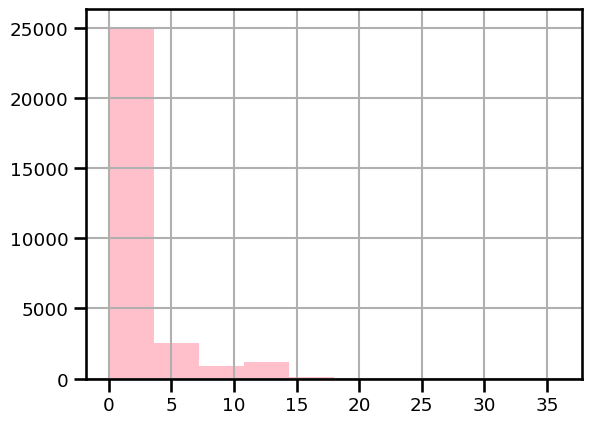

In [ ]:
class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        # Embedded delay mapping inside the transformer
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        # No fitting necessary, so we simply return the transformer.
        return self

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create a new DataFrame for delay columns mapped to numeric values
        # delay_numeric = X[self.delay_columns].applymap(self.delay_mapping.get).astype(float)
        delay_numeric = X[self.delay_columns].apply(lambda col: col.map(self.delay_mapping).astype(float))


        # Handle potential missing values after mapping (optional)
        delay_numeric = delay_numeric.fillna(0)

        # Generate the 'cumulative_delay' feature by summing the numeric values across the delay columns
        X['cumulative_delay'] = delay_numeric.sum(axis=1)

        # Return the original DataFrame with the new 'cumulative_delay' feature added
        return X



# Create the pipeline
pipeline = Pipeline(steps=[
    ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns))
])

# Test the pipeline
transformed_df = pipeline.fit_transform(df)

# Visualize the cumulative_delay column
transformed_df['cumulative_delay'].hist(color='pink')
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = RollingAverageDelayTransformer(delay_columns=delay_columns).fit_transform(X)
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)
        X = RiskRatioTransformer().fit_transform(X,y)
        X = WoeIvTransformer(features=['education', 'marriage'], target_col='default_payment_next_month').fit_transform(X,y)

        return X

# Define the pipeline with column lists passed directly to the transformers
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
# X_train_processed.loc[:, 'rolling_avg_delay':].info()
X_train_processed[delay_columns]

,pay_delay_4_april,pay_delay_5_may,pay_delay_6_june,pay_delay_7_july,pay_delay_8_august,pay_delay_9_september
27420,No consumption,No consumption,No consumption,No consumption,No consumption,No consumption
15350,2 months delay,2 months delay,2 months delay,2 months delay,2 months delay,2 months delay
26641,Revolving credit,Revolving credit,Paid in full,Paid in full,Paid in full,Paid in full
21618,Paid in full,Paid in full,Paid in full,Paid in full,Paid in full,Paid in full
11570,No consumption,No consumption,No consumption,No consumption,No consumption,No consumption
...,...,...,...,...,...,...
14166,Paid in full,Paid in full,Paid in full,Paid in full,Revolving credit,Revolving credit
21763,No consumption,No consumption,No consumption,No consumption,No consumption,No consumption
23938,2 months delay,2 months delay,2 months delay,2 months delay,2 months delay,2 months delay
16679,3 months delay,2 months delay,2 months delay,2 months delay,2 months delay,1 month delay


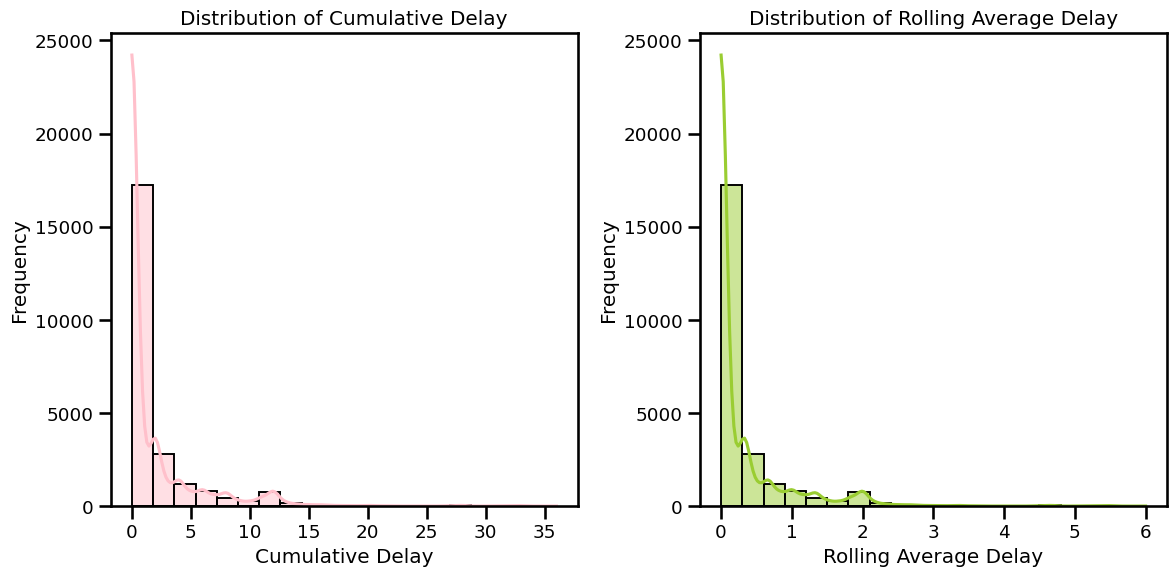

In [ ]:
# Assuming the DataFrame df_with_new_features exists and has 'cumulative_delay' and 'rolling_avg_delay' columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for 'cumulative_delay'
sns.histplot(X_train_processed['cumulative_delay'], bins=20, color='pink', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Cumulative Delay')
axes[0].set_xlabel('Cumulative Delay')
axes[0].set_ylabel('Frequency')

# Plot for 'rolling_avg_delay'
sns.histplot(X_train_processed['rolling_avg_delay'], bins=20, color='yellowgreen', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Rolling Average Delay')
axes[1].set_xlabel('Rolling Average Delay')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Cumulative Delay Categorical Transformer

In [ ]:
class CumulativeDelayBinningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column='cumulative_delay', bins=[-np.inf, 0, 5, 10, 15, np.inf], labels=['No Delay', 'Low Delay', 'Moderate Delay', 'High Delay', 'Severe Delay']):
        self.column = column
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Apply binning to the cumulative_delay column
        X['cumulative_delay_category'] = pd.cut(X[self.column], bins=self.bins, labels=self.labels, ordered=True)

        # Return the updated DataFrame with the new 'cumulative_delay_category' column
        return X


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = RollingAverageDelayTransformer(delay_columns=delay_columns).fit_transform(X)
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayBinningTransformer().fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)
        X = RiskRatioTransformer().fit_transform(X,y)
        X = WoeIvTransformer(features=['education', 'marriage'], target_col='default_payment_next_month').fit_transform(X,y)

        return X

# Define the pipeline with column lists passed directly to the transformers
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.loc[:, 'rolling_avg_delay':].info()
# X_train_processed[delay_columns]

<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   rolling_avg_delay                            23972 non-null  float64 
 1   high_risk_delay                              23972 non-null  bool    
 2   severe_delay_count                           23972 non-null  int64   
 3   cumulative_delay                             23972 non-null  float64 
 4   cumulative_delay_category                    23972 non-null  category
 5   severe_delay_payment_ratio                   23972 non-null  float64 
 6   avg_payment_severe_delays                    23972 non-null  float64 
 7   deferred_and_decreasing_payments             23972 non-null  bool    
 8   severe_deferred_and_decreasing_payments      23972 non-null  bool    
 9   severe_deferred_and_any_decreasing_payments  23972 non-null  b

#### Data Check

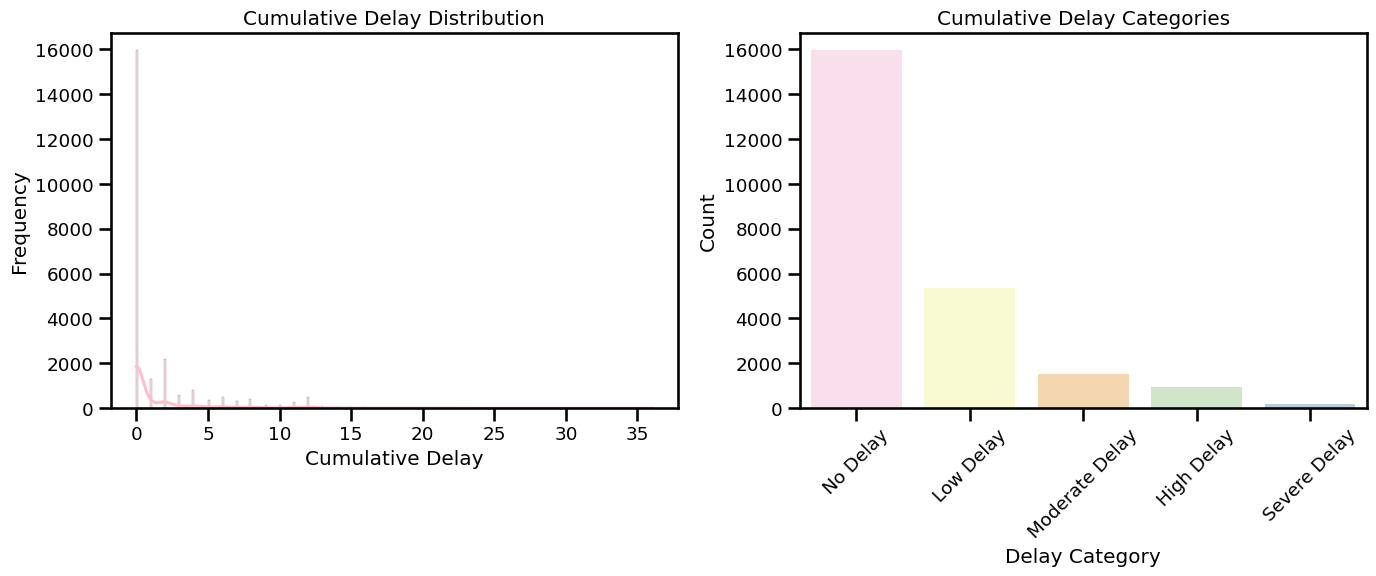

In [ ]:
palette='Pastel1_r'
# Set up the figure and axes for a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for cumulative_delay (histogram)
sns.histplot(X_train_processed['cumulative_delay'], kde=True, ax=axes[0], color='pink')
axes[0].set_title('Cumulative Delay Distribution')
axes[0].set_xlabel('Cumulative Delay')
axes[0].set_ylabel('Frequency')

# Plot for cumulative_delay_category (bar plot)
sns.countplot(x=X_train_processed['cumulative_delay_category'], ax=axes[1],
              hue=X_train_processed['cumulative_delay_category'], palette=palette)
axes[1].set_title('Cumulative Delay Categories')
axes[1].set_xlabel('Delay Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


### Final Data Checks

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engineering_pipeline_utils import delay_columns, pay_columns, bill_columns

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = RollingAverageDelayTransformer(delay_columns=delay_columns).fit_transform(X)  # Added Rolling Average Delay Transformer
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayBinningTransformer().fit_transform(X)  # Newly added cumulative delay binning step
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        X = EducationMarriageUnknownFlagTransformer().fit_transform(X)  # Education and marriage flags
        X = RiskRatioTransformer().fit_transform(X, y)  # Risk ratio transformer
        X = WoeIvTransformer(features=['education', 'marriage'], target_col='default_payment_next_month').fit_transform(X, y)  # WoE/IV transformer

        return X

# Define the pipeline with column lists passed directly to the transformers
test_feature_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),  # Outlier removal
    ('feature_engineering', CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns))
])

# Step 2: Fit the pipeline and transform the data (without preprocessing)
X_train_processed = test_feature_pipeline.fit_transform(X_train)

# Step 3: Display the resulting DataFrame to check if the new features were created correctly
X_train_processed.loc[:, 'rolling_avg_delay':].info()
# X_train_processed[delay_columns]

<class 'pandas.core.frame.DataFrame'>
Index: 23972 entries, 27420 to 16321
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   rolling_avg_delay                            23972 non-null  float64 
 1   high_risk_delay                              23972 non-null  bool    
 2   severe_delay_count                           23972 non-null  int64   
 3   cumulative_delay                             23972 non-null  float64 
 4   cumulative_delay_category                    23972 non-null  category
 5   severe_delay_payment_ratio                   23972 non-null  float64 
 6   avg_payment_severe_delays                    23972 non-null  float64 
 7   deferred_and_decreasing_payments             23972 non-null  bool    
 8   severe_deferred_and_decreasing_payments      23972 non-null  bool    
 9   severe_deferred_and_any_decreasing_payments  23972 non-null  b

### Feature Engineering Pipeline Script

In [7]:
script_content = r'''
# feature_engineering_pipeline_utils.py

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np

# -----------  Define the columns ------------#

# Delay Columns (New delay columns added)
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']

delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]

# Numeric Features (New numeric features added)
numeric_features = ['age', 'limit_bal', 'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
                    'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september', 'pay_amt_4_april',
                    'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september',
                    'severe_delay_count', 'cumulative_delay', 'severe_delay_payment_ratio', 'avg_payment_severe_delays',
                    'total_payments', 'avg_payment', 'payment_std', 'weighted_payment_sum', 'total_bills', 'debt_to_limit_ratio',
                    'rolling_avg_delay', 'education_risk_ratio', 'marriage_risk_ratio', 'education_woe', 'marriage_woe']  # New features added

# Pay Columns (No change)
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may','pay_amt_6_june', 'pay_amt_7_july','pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may','bill_amt_6_june', 'bill_amt_7_july','bill_amt_8_august', 'bill_amt_9_september']

# Delay Columns (No change)
delay_columns = ['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']

# Bill Columns (No change)
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']

# Categorical Features (New categorical feature added)
categorical_features = ['sex', 'marriage', 'education_marriage', 'cumulative_delay_category']  # Added 'cumulative_delay_category'

# Ordinal Features (No change)
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
                    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']

# Boolean Features (New flags added)
boolean_features = ['high_risk_delay', 'deferred_and_decreasing_payments', 'severe_deferred_and_decreasing_payments',
                    'severe_deferred_and_any_decreasing_payments', 'education_or_marriage_unknown_flag',
                    'education_and_marriage_unknown_flag']  # Added 'education_and_marriage_unknown_flag'

# ------- Outlier Removal Transformer Winsor Robust Returns Pandas DataFrame --------#

class WinsorRobustOutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Apply Winsorization (capping)
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])

        # Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        # Convert back to DataFrame if X was a DataFrame
        if isinstance(X, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

        return X_transformed

# ------- Rolling Average Delay Transformer -------#

class RollingAverageDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        """
        Initialize the transformer with the columns to calculate the rolling average delay.
        """
        self.delay_columns = delay_columns
        # Embedded delay mapping inside the transformer
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        # No fitting necessary, so we simply return the transformer.
        return self

    def transform(self, X):
        """
        Transforms the input DataFrame by calculating the rolling average delay,
        without modifying the original delay columns.

        Parameters:
        - X: pandas DataFrame.

        Returns:
        - Transformed DataFrame with the original columns and an additional
          'rolling_avg_delay' column.
        """
        X = X.copy()  # Avoid modifying the original DataFrame

        # Use apply with map for each column instead of applymap
        delay_numeric = X[self.delay_columns].apply(lambda col: col.map(self.delay_mapping).astype(float))

        # Handle potential missing values after mapping (optional)
        delay_numeric = delay_numeric.fillna(0)

        # Calculate the rolling average delay and add it as a new feature in the original DataFrame
        X['rolling_avg_delay'] = delay_numeric.mean(axis=1)

        return X  # Return the DataFrame with the original and new feature


# ------- High Risk Delay Feature Transformer -------#

class HighRiskDelayFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'high_risk_delay' feature
        X['high_risk_delay'] = X[self.delay_columns].apply(
            lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                      '6 months delay', '7 months delay', '8 months delay',
                                      '9+ months delay'] for delay in row),
            axis=1
        )

        return X

# ------- Severe Delay Count Transformer -------#

class SevereDelayCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_delay_count' feature
        X['severe_delay_count'] = X[self.delay_columns].apply(
            lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay',
                                                            '5 months delay', '6 months delay',
                                                            '7 months delay', '8 months delay',
                                                            '9+ months delay']),
            axis=1
        )

        return X

# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        # Embedded delay mapping inside the transformer
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        # No fitting necessary, so we simply return the transformer.
        return self

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create a new DataFrame for delay columns mapped to numeric values
        # delay_numeric = X[self.delay_columns].applymap(self.delay_mapping.get).astype(float)
        delay_numeric = X[self.delay_columns].apply(lambda col: col.map(self.delay_mapping).astype(float))


        # Handle potential missing values after mapping (optional)
        delay_numeric = delay_numeric.fillna(0)

        # Generate the 'cumulative_delay' feature by summing the numeric values across the delay columns
        X['cumulative_delay'] = delay_numeric.sum(axis=1)

        # Return the original DataFrame with the new 'cumulative_delay' feature added
        return X

# ------- Cumulative Delay Binning Transformer -------#

class CumulativeDelayBinningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column='cumulative_delay', bins=[-np.inf, 0, 5, 10, 15, np.inf], labels=['No Delay', 'Low Delay', 'Moderate Delay', 'High Delay', 'Severe Delay']):
        self.column = column
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Apply binning to the cumulative_delay column
        X['cumulative_delay_category'] = pd.cut(X[self.column], bins=self.bins, labels=self.labels, ordered=True)

        # Return the updated DataFrame with the new 'cumulative_delay_category' column
        return X


# ------- Avg Payment Severe Delays Transformer -------#

class AvgPaymentSevereDelaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No parameters to initialize for this transformer

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define severe delay categories
        delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Calculate the average payment for severe delays
        def calculate_avg_payment_for_severe_delays(row):
            total_payment = 0
            severe_delay_months = 0
            for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
                if row[f'pay_delay_{i+4}_{month}'] in delays:
                    total_payment += row[f'pay_amt_{i+4}_{month}']
                    severe_delay_months += 1
            return total_payment / severe_delay_months if severe_delay_months > 0 else 0

        # Apply the function to each row
        X['avg_payment_severe_delays'] = X.apply(calculate_avg_payment_for_severe_delays, axis=1)

        return X


# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        ).astype(int)

        return X


# ------- Severe Delay Payment Ratio Transformer -------#

class SevereDelayPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, scaling_factor=10000):
        self.pay_columns = pay_columns
        self.scaling_factor = scaling_factor

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payment across the specified columns
        X['total_payment'] = X[self.pay_columns].sum(axis=1)

        # Calculate the severe delay payment ratio
        X['severe_delay_payment_ratio'] = X.apply(
            lambda row: (row['severe_delay_count'] / row['total_payment'] * self.scaling_factor)
            if row['total_payment'] > 0 else 0,
            axis=1
        )

        # Drop the temporary 'total_payment' column if desired
        X.drop(columns=['total_payment'], inplace=True)

        return X


# ------- Deferred & Decreasing Payments Transformer -------#

class DeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'deferred_and_decreasing_payments' feature
        X['deferred_and_decreasing_payments'] = X.apply(self._check_deferred_and_decreasing, axis=1)

        return X

    def _check_deferred_and_decreasing(self, row):
        delays = ['1 month delay', '2 months delay', '3 months delay',
                  '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Initialize list to store payments in months with any delay
        delay_payments = []

        # Iterate over the months and collect payments for any delay
        for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
            if row[f'pay_delay_{i+4}_{month}'] in delays:
                delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

        # Check if payments are decreasing over time
        for j in range(1, len(delay_payments)):
            if delay_payments[j] > delay_payments[j-1]:
                return False  # Payments are not consistently decreasing

        return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing


# ------- Severe Deferred & Decreasing Payments Transformer -------#

class SevereDeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_decreasing_payments' feature
        X['severe_deferred_and_decreasing_payments'] = X.apply(self._check_severe_deferred_and_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

        # Return True if both conditions are met
        return deferred and decreasing


# ------- Severe Deferred & Any Decreasing Payments Transformer -------#

class SevereDeferredAndAnyDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_any_decreasing_payments' feature
        X['severe_deferred_and_any_decreasing_payments'] = X.apply(self._check_severe_deferred_and_any_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_any_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are severe deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing (any decrease)
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

        # Return True if both conditions are met
        return deferred and decreasing

# ------- Bill To Payment Ratio Transformer -------#

class BillToPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, month):
        self.month = month

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define the column names based on the month
        ratio_column = f'bill_to_payment_ratio_{self.month}'
        bill_column = f'bill_amt_{self.month}'
        pay_column = f'pay_amt_{self.month}'

        # Calculate the bill-to-payment ratio
        X[ratio_column] = X[bill_column] / X[pay_column].replace(0, np.nan)
        X[ratio_column] = X[ratio_column].fillna(0)

        return X

# ------- Total Payments Transformer -------#

class TotalPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payments across the specified columns
        X['total_payments'] = X[self.pay_columns].sum(axis=1)

        return X

# ------- Average Payment Transformer -------#

class AvgPaymentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_payments_column='total_payments', num_months=6):
        self.total_payments_column = total_payments_column
        self.num_months = num_months

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the average payment
        X['avg_payment'] = X[self.total_payments_column] / self.num_months

        return X

# ------- Standard Deviation Transformer -------#

class PaymentStdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the standard deviation of payments across the specified columns
        X['payment_std'] = X[self.pay_columns].std(axis=1)

        return X

# ------- Weighted Payment Sum Transformer -------#

class WeightedPaymentSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, weights=None):
        self.pay_columns = pay_columns
        self.weights = weights if weights is not None else [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]  # Default weights

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the weighted payment sum across the specified columns
        X['weighted_payment_sum'] = (X[self.pay_columns] * self.weights).sum(axis=1)

        # Return the DataFrame with all original columns plus the new feature
        return X


# ------- Debt To Limit Ratio Transformer -------#

class TotalBillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bill_columns):
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total bills across the specified columns
        X['total_bills'] = X[self.bill_columns].sum(axis=1)

        return X

# ------- Debt To Limit Ratio Transformer -------#

class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
        self.total_bills_column = total_bills_column
        self.limit_bal_column = limit_bal_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Handle cases where limit_bal is zero to avoid division by zero
        epsilon = 1e-10  # Small value to avoid division by zero
        X['debt_to_limit_ratio'] = X[self.total_bills_column] / (X[self.limit_bal_column] + epsilon)

        # Handle infinite values, though this should be rare due to the epsilon
        X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

        return X

# ------- Education & Marriage Interaction Transformer -------#

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)
        X['education_marriage'] = X['education_marriage'].astype('category')

        return X


# ------- Education & Marriage Unknown Flag Transformer -------#

class EducationMarriageUnknownFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Feature for when either education or marriage is "Other/Unknown"
        X['education_or_marriage_unknown_flag'] = ((X['education'] == 'Other/Unknown') |
                                                   (X['marriage'] == 'Unknown/Others')).astype('bool')

        # Feature for when both education and marriage are "Other/Unknown"
        X['education_and_marriage_unknown_flag'] = ((X['education'] == 'Other/Unknown') &
                                                    (X['marriage'] == 'Unknown/Others')).astype('bool')

        return X

# ------- Risk Ratio Transformer -------#

class RiskRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_col='education', marriage_col='marriage', target_col='default_payment_next_month'):
        self.education_col = education_col
        self.marriage_col = marriage_col
        self.target_col = target_col
        self.education_default_rates = None
        self.marriage_default_rates = None

    def fit(self, X, y=None):
        if y is None:
            raise ValueError("Target variable 'y' is required for fit.")
        X = X.copy()
        X[self.target_col] = y  # Add the target column to X

        # Calculate the default rates
        self.education_default_rates = X.groupby(self.education_col, observed=True)[self.target_col].mean()
        self.marriage_default_rates = X.groupby(self.marriage_col, observed=True)[self.target_col].mean()

        return self

    def transform(self, X):
        X = X.copy()
        X['education_risk_ratio'] = X[self.education_col].map(self.education_default_rates).astype(float)
        X['marriage_risk_ratio'] = X[self.marriage_col].map(self.marriage_default_rates).astype(float)
        return X

# ------- WoE & IV Transformer -------#

class WoeIvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features, target_col):
        """
        Initialize the transformer with the list of categorical features
        and the target column for calculating WoE and IV.

        Parameters:
        - features: List of categorical features to calculate WoE and IV.
        - target_col: The target column name (binary classification target).
        """
        self.features = features
        self.target_col = target_col
        self.woe_dict = {}  # To store WoE for each feature
        self.iv_dict = {}   # To store IV for each feature

    def fit(self, X, y=None):
        """
        Fit the transformer by calculating WoE and IV for each categorical feature.

        Parameters:
        - X: Input DataFrame
        - y: Target column (binary)
        """
        df = X.copy()
        df[self.target_col] = y

        for feature in self.features:
            # Group by the feature and calculate counts and sums (events)
            grouped = df.groupby(feature, observed=True)[self.target_col].agg(['count', 'sum'])

            # Calculate non-events and rates
            grouped['non_event'] = grouped['count'] - grouped['sum']
            grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
            grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()

            # Calculate WoE and IV
            grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
            grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

            iv = grouped['iv'].sum()  # Total IV for the feature

            # Store WoE and IV in dictionaries
            self.woe_dict[feature] = grouped['woe']
            self.iv_dict[feature] = iv

        return self

    def transform(self, X):
        """
        Apply the transformer to add WoE columns for each categorical feature.

        Parameters:
        - X: Input DataFrame
        """
        X = X.copy()  # Avoid modifying the original DataFrame

        # Map the calculated WoE back to the dataframe as new columns
        for feature in self.features:
            X[f'{feature}_woe'] = X[feature].map(self.woe_dict[feature]).astype(float)

        return X

    def get_iv(self):
        """
        Return the IV (Information Value) for each feature.
        """
        return self.iv_dict



# ------- Combined Feature Engineering Transformer for IMBPipeline -------#

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        return X

'''

# Write the script to a file
with open("feature_engineering_pipeline_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_pipeline_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_pipeline_utils
importlib.reload(feature_engineering_pipeline_utils)

from feature_engineering_pipeline_utils import *

Script successfully written to feature_engineering_pipeline_utils.py


#### Loan Data Utils

In [1]:
script_content=r'''
# loan_data_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

import json

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

target = 'default_payment_next_month'
# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

# ---------  Sex Column Processing  --------- #
# ---- SEX: Gender (1 = male, 2 = female) ----#

# results in cat.categories = ['Female', 'Male'][0,1]
def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# results in cat.categories = ['Female', 'Male'][2,1] (alphabetically ordered)
def process_sex_column_cat_codes_one_two(df):
    try:
        if 'sex' in df.columns:
            # Convert numeric values to categorical, maintaining original codes
            df['sex'] = df['sex'].astype('category')  # First, ensure the column is categorical

            # Define the categories explicitly and map original values (1: Male, 2: Female)
            df['sex'].cat.set_categories([1, 2], rename=True, inplace=True)  # Set categories as 1, 2
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})  # Replace numeric values with labels

            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

# ---------  Marriage Column Processing  --------- #

# ---- MARRIAGE: Marital status (1 = married, 2 = single, 3 = other) ----#

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df

# ---------  Target Column Processing  --------- #

def process_default_payment_column(df):
    try:
        if 'default_payment_next_month' in df.columns:
            # Label the categories
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({0: 'No Default', 1: 'Default'})
            df['default_payment_next_month'] = df['default_payment_next_month'].astype('category')
            logging.info("Default payment column labeled and converted to categorical successfully.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing default payment column: {e}")
    return df


# Convert labels to numeric for modeling
def convert_default_payment_to_numeric(df):
    try:
        if 'default_payment_next_month' in df.columns:
            df['default_payment_next_month'] = df['default_payment_next_month'].replace({'No Default': 0, 'Default': 1}).astype(int)
            logging.info("Default payment column converted back to numeric for modeling.")
        else:
            logging.warning("Default payment column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting default payment column to numeric: {e}")
    return df

# ---------  Pay Delay Column Processing  --------- #

def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

# ---------  Education Column Processing  --------- #

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


#-------- Utility and validation functions first ----------#

def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df


#--------  Load and Preprocess Data  --------- #

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            # df = process_sex_column_cat_codes_one_two(df)
            df = process_marriage_column(df)
            # df = process_default_payment_column(df) # leave as numeric for modeling
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

#--------  Load Preprocess Split Data  --------- #

def load_preprocess_split_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")

#--------  Plot Categorical Data Functions  --------- #

categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# --------- Custom Transformer for Threshold Classifier --------- #

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=None, threshold=0.5):
        # Default to LogisticRegression if no classifier is provided
        self.base_classifier = base_classifier if base_classifier is not None else LogisticRegression(max_iter=1000)
        self.threshold = threshold

    def fit(self, X, y):
        # Fit the base classifier on the training data
        self.base_classifier.fit(X, y)
        return self

    def predict(self, X):
        # Get the predicted probabilities for class 1 (positive class)
        probas = self.base_classifier.predict_proba(X)[:, 1]
        # Apply the threshold to make class predictions
        return (probas >= self.threshold).astype(int)

    def predict_proba(self, X):
        # Return the predicted probabilities from the base classifier
        return self.base_classifier.predict_proba(X)


#--------  Classification Report Functions  --------- #

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")


# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------  Classification Report Functions for Categories  --------- #

# Function to save classification reports with custom categories
def save_classification_reports_with_categories(reports, filename='classification_reports.json'):
    try:
        # Adjust the keys for the class labels to match your custom categories
        for model, report in reports.items():
            if '0' in report and '1' in report:
                report['No Default'] = report.pop('0')
                report['Default'] = report.pop('1')

        with open(filename, 'w') as json_file:
            json.dump(reports, json_file, indent=4)  # Pretty-printing for clarity
        print(f"Classification reports with categories saved as {filename}")
    except Exception as e:
        print(f"Error saving classification reports: {e}")

# Updated plotting function with category names and annotations
def plot_classification_report_metrics_with_categories(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['No Default', 'No Default', 'No Default', 'Default', 'Default', 'Default'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['No Default']['precision'],
            report['No Default']['recall'],
            report['No Default']['f1-score'],
            report['Default']['precision'],
            report['Default']['recall'],
            report['Default']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

#--------   Plot Selected Features  --------#

def plot_selected_features(selected_features, model_name, figsize=(16,8)):
    features = list(selected_features.keys())
    importances = list(selected_features.values())
    plt.figure(figsize=figsize)
    sns.barplot(x=importances, y=features, hue=importances, palette='viridis')
    plt.title(f'Selected Features and their Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [2]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [3]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully
